In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# READING THE CSV FILE 

In [3]:
df = pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
print(df)

      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.074402   
4               NCD19         8.93          Low Fat         0.064299   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.064709   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092            OUT049   
1              

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(14204, 12)

In [5]:
df.describe

<bound method NDFrame.describe of       Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.074402   
4               NCD19         8.93          Low Fat         0.064299   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.064709   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092   

In [6]:
print('The number of samples in data is {}.'.format(df.shape[0]))

The number of samples in data is 14204.


In [7]:
# explore the existing data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
#explore the numeric data types
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# MULTIPLE FEATURES(N-DIMENSIONAL)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Type'>

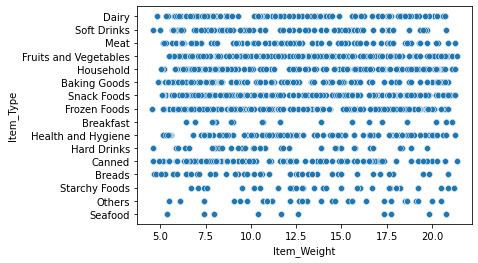

In [9]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Type',data = df)

<AxesSubplot:xlabel='Item_MRP', ylabel='Outlet_Type'>

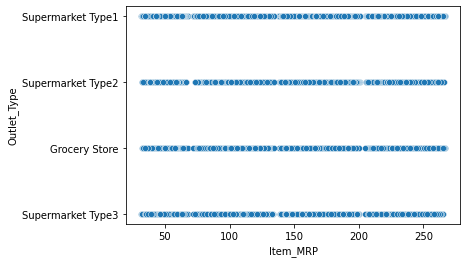

In [10]:
sns.scatterplot(x = 'Item_MRP',y = 'Outlet_Type',data = df)

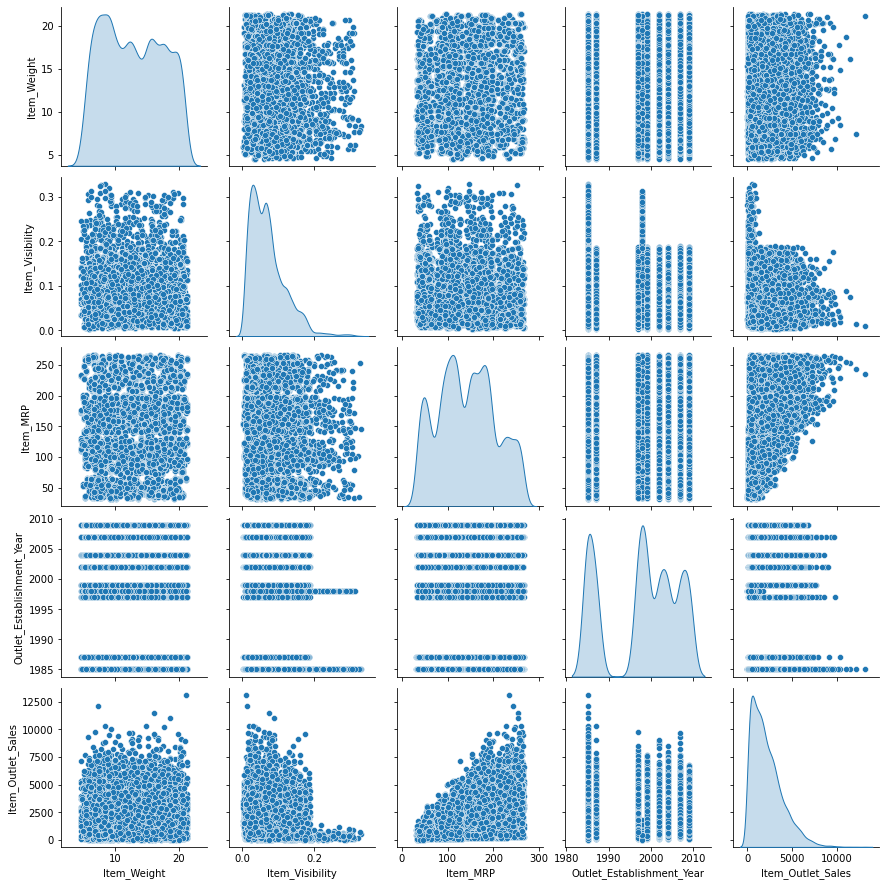

In [11]:
sns.pairplot(df,diag_kind = 'kde')

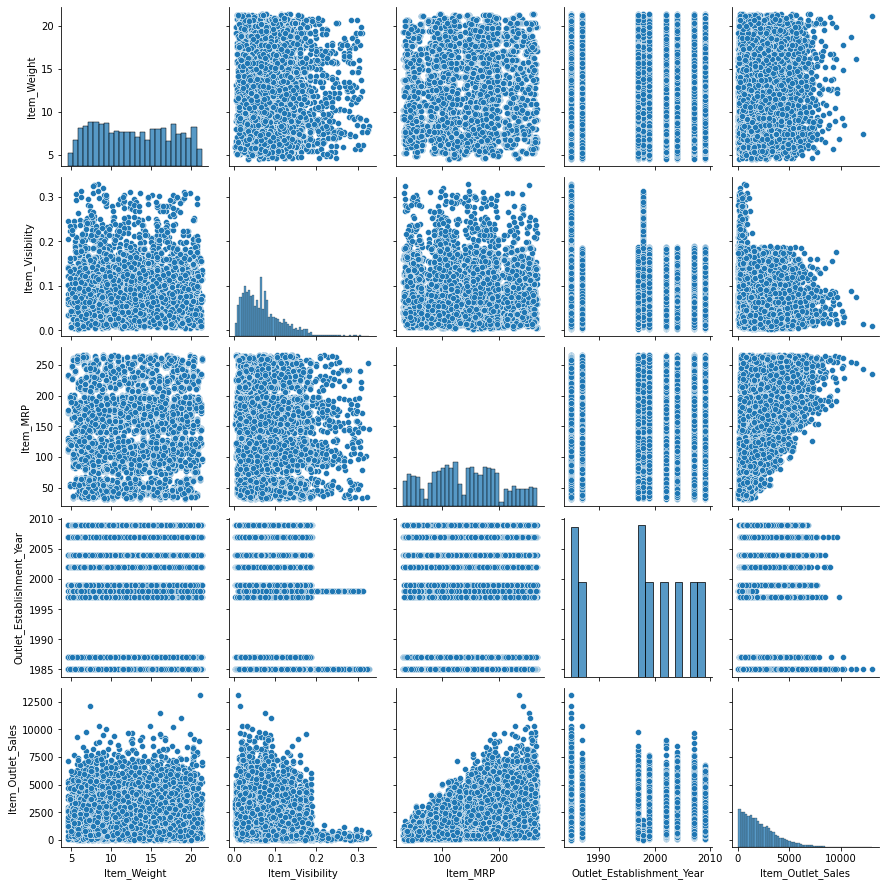

In [16]:
sns.pairplot(df,diag_kind = 'hist')

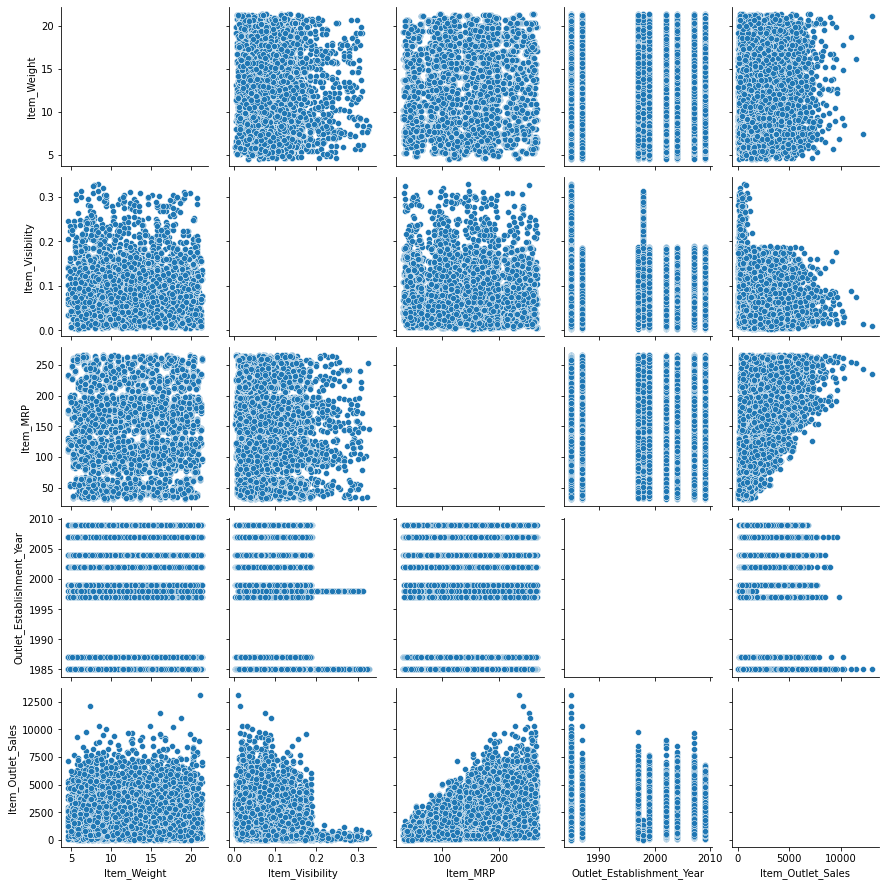

In [13]:
sns.pairplot(df,diag_kind = 'scatter')

# INTRODUCING SCIKIT LEARN

# DROPPING THE ITEM_IDENTIFIER COLUMNS

In [14]:
x = df.drop('Item_Identifier', axis = 1)
y = df['Item_Identifier']

In [15]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [15]:
y

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 14204, dtype: object

In [16]:
from sklearn.model_selection import train_test_split 

In [17]:
#random state
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .40,random_state = 107)

In [18]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7302,13.15,Low Fat,0.043552,Snack Foods,184.4950,OUT027,1985,Medium,Tier 3,Supermarket Type3,7873.0850
9819,13.30,Low Fat,0.021256,Baking Goods,119.1124,OUT013,1987,High,Tier 3,Supermarket Type1,NaN
1669,7.51,Low Fat,0.017429,Fruits and Vegetables,229.6010,OUT046,1997,Small,Tier 1,Supermarket Type1,6201.9270
5717,21.25,Low Fat,0.114246,Health and Hygiene,231.2300,OUT017,2007,Small,Tier 2,Supermarket Type1,3029.3900
8951,18.85,Low Fat,0.040453,Household,247.0144,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3403,6.85,Low Fat,0.022883,Frozen Foods,261.2594,OUT046,1997,Small,Tier 1,Supermarket Type1,2878.2534
6798,14.30,Regular,0.109144,Fruits and Vegetables,88.2856,OUT010,1998,Medium,Tier 3,Grocery Store,175.7712
4550,11.80,Low Fat,0.058976,Health and Hygiene,81.7618,OUT018,2009,Medium,Tier 3,Supermarket Type2,966.7416
4569,14.70,Low Fat,0.072238,Fruits and Vegetables,47.5034,OUT013,1987,High,Tier 3,Supermarket Type1,972.0680


In [19]:
y_test

2737     FDA33
10000    NCT06
8316     FDA11
2017     DRJ11
655      NCJ42
         ...  
10294    NCX17
6190     NCC18
1434     FDR46
13956    FDP15
1957     FDS31
Name: Item_Identifier, Length: 5682, dtype: object

In [20]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2737,6.48,Low Fat,0.033900,Snack Foods,146.9076,OUT046,1997,Small,Tier 1,Supermarket Type1,2956.1520
10000,17.10,Low Fat,0.038957,Household,165.1842,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8316,7.75,Low Fat,0.043483,Baking Goods,94.3436,OUT017,2007,Small,Tier 2,Supermarket Type1,2363.5900
2017,9.50,Low Fat,0.142425,Hard Drinks,189.9872,OUT010,1998,Medium,Tier 3,Grocery Store,756.3488
655,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1,1230.3984
...,...,...,...,...,...,...,...,...,...,...,...
10294,21.25,Low Fat,0.113603,Health and Hygiene,231.7300,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
6190,19.10,Low Fat,0.178273,Household,172.4422,OUT017,2007,Small,Tier 2,Supermarket Type1,1551.9798
1434,16.85,Low Fat,0.244102,Snack Foods,148.0760,OUT019,1985,Small,Tier 1,Grocery Store,146.4760
13956,15.20,Low Fat,0.083943,Meat,257.4330,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN


In [21]:
y_train

7302    FDX58
9819    FDD36
1669    FDH08
5717    NCX17
8951    NCL42
        ...  
3403    FDJ41
6798    FDF08
4550    NCU05
4569    FDG57
2110    FDH40
Name: Item_Identifier, Length: 8522, dtype: object

# DROPING SOME THE Item_Type COLUMNS

In [22]:
x1 = df.drop('Item_Type', axis = 1)
y1 = df['Item_Type']

In [23]:
x1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [24]:
y1

0                        Dairy
1                  Soft Drinks
2                         Meat
3        Fruits and Vegetables
4                    Household
                 ...          
14199              Snack Foods
14200            Starchy Foods
14201       Health and Hygiene
14202                   Canned
14203                   Canned
Name: Item_Type, Length: 14204, dtype: object

In [25]:
from sklearn.model_selection import train_test_split 

In [26]:
#random state
x1_train,x1_test,y1_train,y1_test = train_test_split(x1, y1, test_size = .40,random_state = 107)

In [27]:
x1_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7302,FDX58,13.15,Low Fat,0.043552,184.4950,OUT027,1985,Medium,Tier 3,Supermarket Type3,7873.0850
9819,FDD36,13.30,Low Fat,0.021256,119.1124,OUT013,1987,High,Tier 3,Supermarket Type1,NaN
1669,FDH08,7.51,Low Fat,0.017429,229.6010,OUT046,1997,Small,Tier 1,Supermarket Type1,6201.9270
5717,NCX17,21.25,Low Fat,0.114246,231.2300,OUT017,2007,Small,Tier 2,Supermarket Type1,3029.3900
8951,NCL42,18.85,Low Fat,0.040453,247.0144,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3403,FDJ41,6.85,Low Fat,0.022883,261.2594,OUT046,1997,Small,Tier 1,Supermarket Type1,2878.2534
6798,FDF08,14.30,Regular,0.109144,88.2856,OUT010,1998,Medium,Tier 3,Grocery Store,175.7712
4550,NCU05,11.80,Low Fat,0.058976,81.7618,OUT018,2009,Medium,Tier 3,Supermarket Type2,966.7416
4569,FDG57,14.70,Low Fat,0.072238,47.5034,OUT013,1987,High,Tier 3,Supermarket Type1,972.0680


In [28]:
x1_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2737,FDA33,6.48,Low Fat,0.033900,146.9076,OUT046,1997,Small,Tier 1,Supermarket Type1,2956.1520
10000,NCT06,17.10,Low Fat,0.038957,165.1842,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8316,FDA11,7.75,Low Fat,0.043483,94.3436,OUT017,2007,Small,Tier 2,Supermarket Type1,2363.5900
2017,DRJ11,9.50,Low Fat,0.142425,189.9872,OUT010,1998,Medium,Tier 3,Grocery Store,756.3488
655,NCJ42,19.75,Low Fat,0.014301,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1,1230.3984
...,...,...,...,...,...,...,...,...,...,...,...
10294,NCX17,21.25,Low Fat,0.113603,231.7300,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
6190,NCC18,19.10,Low Fat,0.178273,172.4422,OUT017,2007,Small,Tier 2,Supermarket Type1,1551.9798
1434,FDR46,16.85,Low Fat,0.244102,148.0760,OUT019,1985,Small,Tier 1,Grocery Store,146.4760
13956,FDP15,15.20,Low Fat,0.083943,257.4330,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN


In [29]:
y1_test

2737               Snack Foods
10000                Household
8316              Baking Goods
2017               Hard Drinks
655                  Household
                 ...          
10294       Health and Hygiene
6190                 Household
1434               Snack Foods
13956                     Meat
1957     Fruits and Vegetables
Name: Item_Type, Length: 5682, dtype: object

In [30]:
y1_train

7302              Snack Foods
9819             Baking Goods
1669    Fruits and Vegetables
5717       Health and Hygiene
8951                Household
                ...          
3403             Frozen Foods
6798    Fruits and Vegetables
4550       Health and Hygiene
4569    Fruits and Vegetables
2110             Frozen Foods
Name: Item_Type, Length: 8522, dtype: object

In [56]:
print(df.shape)

(14204, 12)


# DROPPING THE OUTLET IDENTIFIER COLUMNS

In [31]:
x2 = df.drop('Outlet_Identifier', axis = 1)
y2 = df['Outlet_Identifier']

In [32]:
x2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,2007,Small,Tier 2,Supermarket Type1,NaN


In [70]:
y2

0        OUT049
1        OUT018
2        OUT049
3        OUT010
4        OUT013
          ...  
14199    OUT046
14200    OUT018
14201    OUT045
14202    OUT017
14203    OUT045
Name: Outlet_Identifier, Length: 14204, dtype: object

In [33]:
from sklearn.model_selection import train_test_split 

In [34]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2, y2, test_size = .40,random_state = 107)

In [35]:
x2_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7302,FDX58,13.15,Low Fat,0.043552,Snack Foods,184.4950,1985,Medium,Tier 3,Supermarket Type3,7873.0850
9819,FDD36,13.30,Low Fat,0.021256,Baking Goods,119.1124,1987,High,Tier 3,Supermarket Type1,NaN
1669,FDH08,7.51,Low Fat,0.017429,Fruits and Vegetables,229.6010,1997,Small,Tier 1,Supermarket Type1,6201.9270
5717,NCX17,21.25,Low Fat,0.114246,Health and Hygiene,231.2300,2007,Small,Tier 2,Supermarket Type1,3029.3900
8951,NCL42,18.85,Low Fat,0.040453,Household,247.0144,2002,Small,Tier 2,Supermarket Type1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3403,FDJ41,6.85,Low Fat,0.022883,Frozen Foods,261.2594,1997,Small,Tier 1,Supermarket Type1,2878.2534
6798,FDF08,14.30,Regular,0.109144,Fruits and Vegetables,88.2856,1998,Medium,Tier 3,Grocery Store,175.7712
4550,NCU05,11.80,Low Fat,0.058976,Health and Hygiene,81.7618,2009,Medium,Tier 3,Supermarket Type2,966.7416
4569,FDG57,14.70,Low Fat,0.072238,Fruits and Vegetables,47.5034,1987,High,Tier 3,Supermarket Type1,972.0680


In [36]:
x2_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2737,FDA33,6.48,Low Fat,0.033900,Snack Foods,146.9076,1997,Small,Tier 1,Supermarket Type1,2956.1520
10000,NCT06,17.10,Low Fat,0.038957,Household,165.1842,2007,Small,Tier 2,Supermarket Type1,NaN
8316,FDA11,7.75,Low Fat,0.043483,Baking Goods,94.3436,2007,Small,Tier 2,Supermarket Type1,2363.5900
2017,DRJ11,9.50,Low Fat,0.142425,Hard Drinks,189.9872,1998,Medium,Tier 3,Grocery Store,756.3488
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,1997,Small,Tier 1,Supermarket Type1,1230.3984
...,...,...,...,...,...,...,...,...,...,...,...
10294,NCX17,21.25,Low Fat,0.113603,Health and Hygiene,231.7300,1997,Small,Tier 1,Supermarket Type1,NaN
6190,NCC18,19.10,Low Fat,0.178273,Household,172.4422,2007,Small,Tier 2,Supermarket Type1,1551.9798
1434,FDR46,16.85,Low Fat,0.244102,Snack Foods,148.0760,1985,Small,Tier 1,Grocery Store,146.4760
13956,FDP15,15.20,Low Fat,0.083943,Meat,257.4330,1997,Small,Tier 1,Supermarket Type1,NaN


In [57]:
print(df.shape)

(14204, 12)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [1]:
.isna().sum()

NameError: name 'train' is not defined